In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 k

In [3]:
from pycaret.clustering import *
from pycaret.clustering import setup

In [6]:
from pycaret.datasets import get_data

# Importing the dataset using PyCaret
data = get_data('CC GENERAL')


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


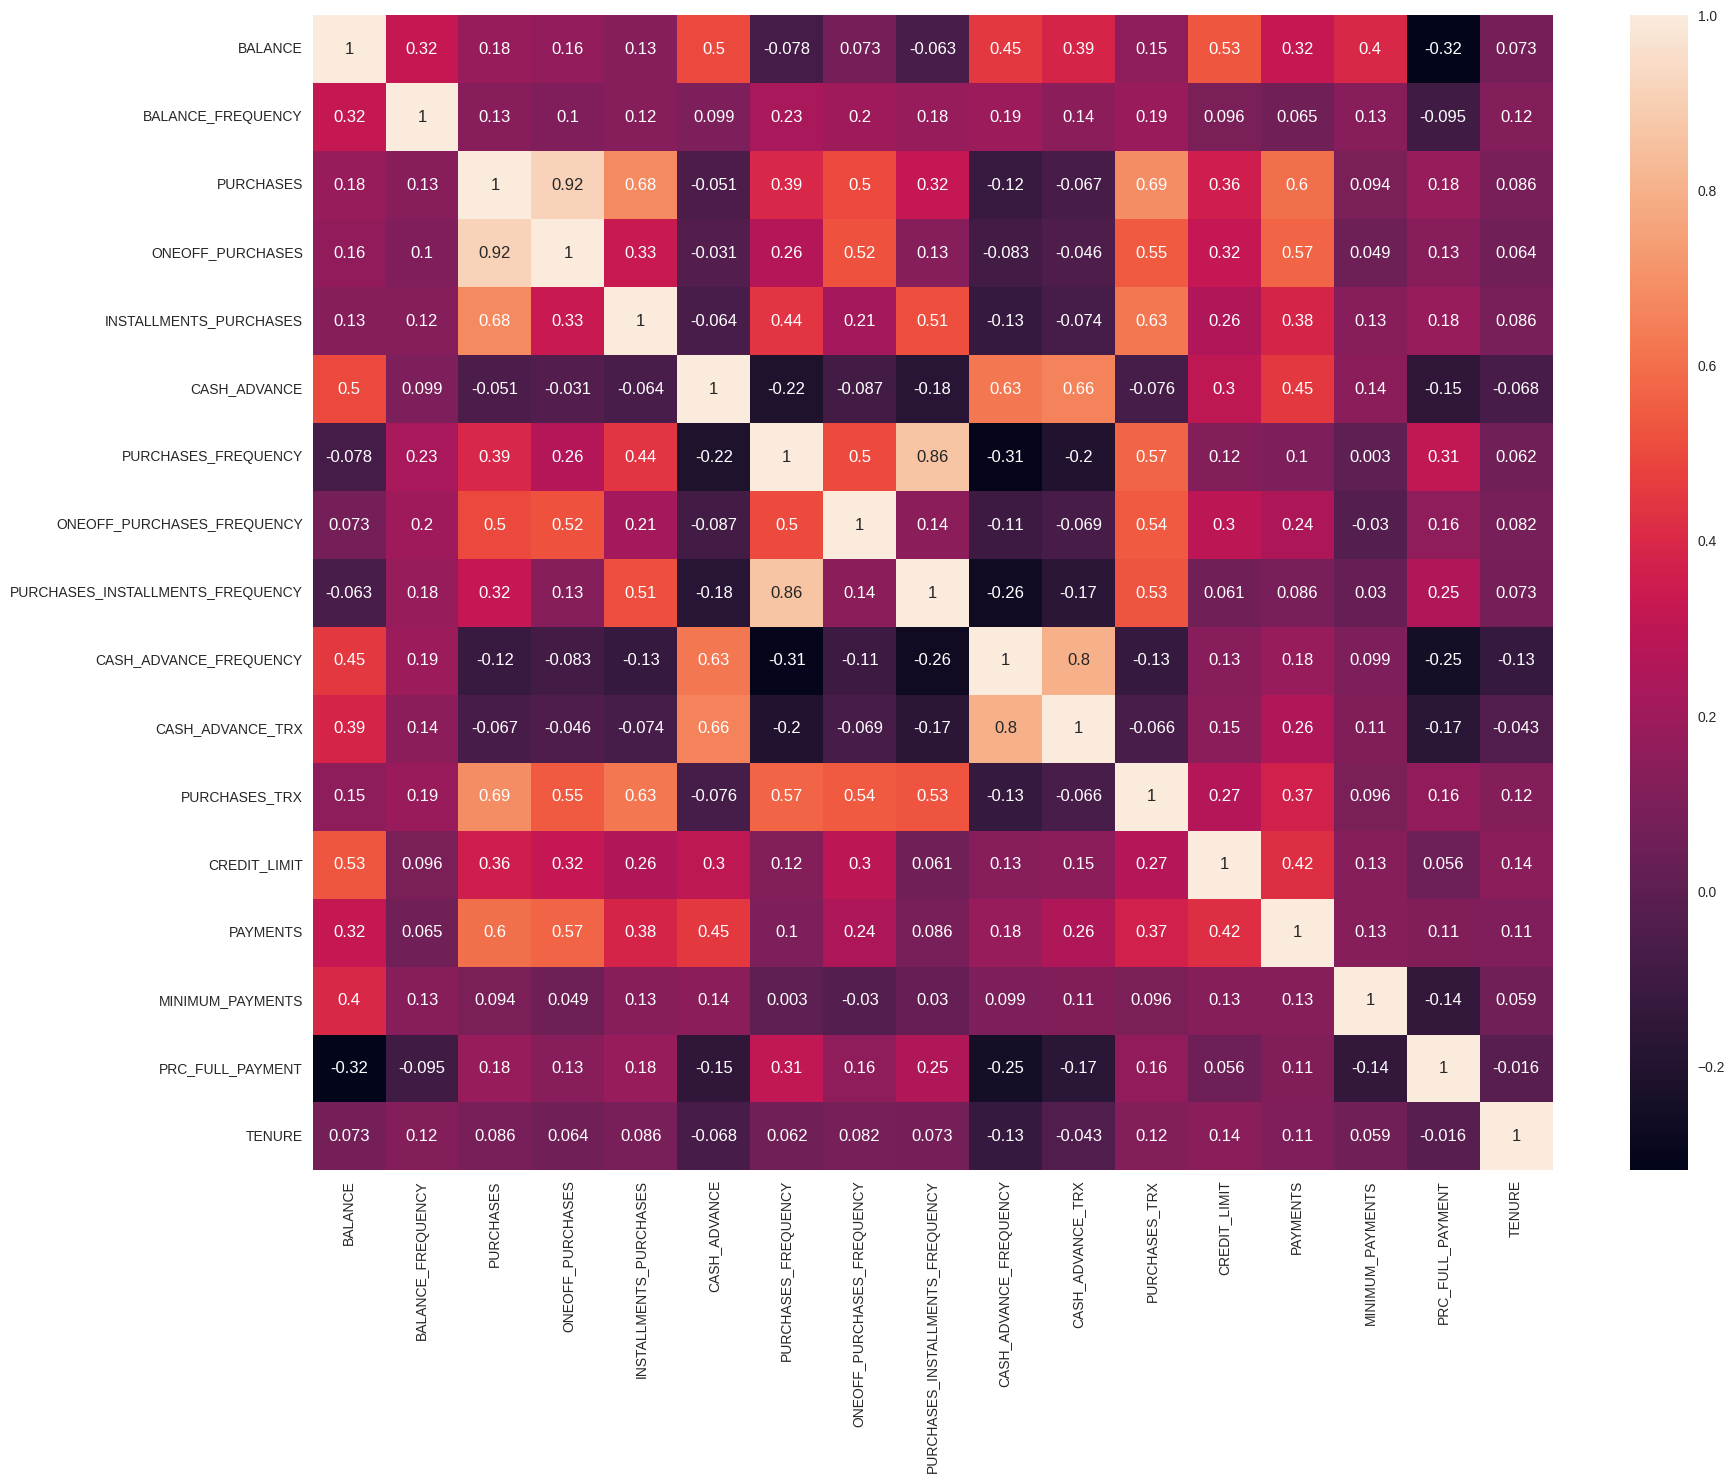

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns
num_col = data.select_dtypes(exclude=['object']).columns
plt.subplots(figsize=(20,15))
sns.heatmap(data[num_col].corr(),annot = True);

In [7]:
from pycaret.classification import *
s = setup(data, target='TENURE', normalize=True, pca=True, verbose=False,
            remove_multicollinearity=True,
            session_id=123)


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
from pycaret.clustering import *

# Setup the environment
setup(data, session_id=123)

# Create K-means model
kmeans_model = create_model('kmeans')

,Description,Value
0,Session id,123
1,Original data shape,"(8950, 18)"
2,Transformed data shape,"(8950, 8967)"
3,Numeric features,17
4,Categorical features,1
5,Rows with missing values,3.5%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3967,2675.3736,1.3211,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
kmean_results = assign_model(kmeans_model)
kmean_results.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.400002,0.000000,95.400002,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802078,139.509781,0.000000,12,Cluster 2
1,C10002,3202.467529,0.909091,0.000000,0.000000,0.000000,6442.945312,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032715,1072.340210,0.222222,12,Cluster 0
2,C10003,2495.148926,1.000000,773.169983,773.169983,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066772,627.284790,0.000000,12,Cluster 0
3,C10004,1666.670532,0.636364,1499.000000,1499.000000,0.000000,205.788010,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,Cluster 0
4,C10005,817.714355,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334778,244.791245,0.000000,12,Cluster 2


In [13]:
plot_model(kmeans_model)

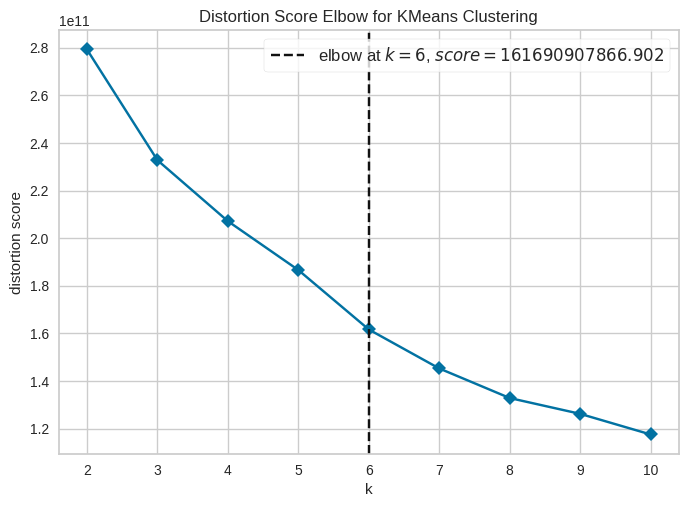

In [12]:
plot_model(kmeans_model, plot = 'elbow')

In [ ]:
plot_model(kmeans_model, plot = 'distribution') #to see size of clusters

In [ ]:
# functional API
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/clustring credit card')
print(loaded_model)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['BALANCE', 'BALANCE_FREQUENCY',
                                             'PURCHASES', 'ONEOFF_PURCHASES',
                                             'INSTALLMENTS_PURCHASES',
                                             'CASH_ADVANCE',
                                             'PURCHASES_FREQUENCY',
                                             'ONEOFF_PURCHASES_FREQUENCY',
                                             'PURCHASES_INSTALLMENTS_FREQUENCY',
                                             'CASH_ADVANCE_FREQUENCY',
                                             'CASH_ADVANCE_TRX',
                                             '...
                 TransformerWrapper(exclude=None, include=['CUST_ID'],
                                    tran

In [ ]:
# functional API
save_model(kmeans_model, 'clustring credit card')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['BALANCE', 'BALANCE_FREQUENCY',
                                              'PURCHASES', 'ONEOFF_PURCHASES',
                                              'INSTALLMENTS_PURCHASES',
                                              'CASH_ADVANCE',
                                              'PURCHASES_FREQUENCY',
                                              'ONEOFF_PURCHASES_FREQUENCY',
                                              'PURCHASES_INSTALLMENTS_FREQUENCY',
                                              'CASH_ADVANCE_FREQUENCY',
                                              'CASH_ADVANCE_TRX',
                                              'PURCHASES_T...
                  TransformerWrapper(exclude=None, include=['CUST_ID'],
                                     transformer=OneHotEncoder(cols=['CUST_ID'],

Hierarchical clustering is a method of cluster analysis that attempts to create a hierarchy of clusters. Hierarchical clustering strategies are generally divided into two types:

Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In [14]:
hierarchical_clust = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3815,2215.9590,1.4904,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
hierarchical_results = assign_model(hierarchical_clust)
hierarchical_results.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.400002,0.000000,95.400002,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802078,139.509781,0.000000,12,Cluster 3
1,C10002,3202.467529,0.909091,0.000000,0.000000,0.000000,6442.945312,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032715,1072.340210,0.222222,12,Cluster 0
2,C10003,2495.148926,1.000000,773.169983,773.169983,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066772,627.284790,0.000000,12,Cluster 0
3,C10004,1666.670532,0.636364,1499.000000,1499.000000,0.000000,205.788010,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,Cluster 0
4,C10005,817.714355,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334778,244.791245,0.000000,12,Cluster 3


In [16]:
plot_model(hierarchical_clust)

In [17]:
plot_model(hierarchical_clust, plot ='tsne')